In [1]:
import cv2
import numpy as np
from scipy import signal
import matplotlib.pylab as plt

from helpers import read_im, write_im
from kernels import antialiased_circ, aliased_circ

In [2]:
img = read_im('copenhagen.png', cv2.IMREAD_GRAYSCALE)[420:-116, 448:-600]
print(img.shape)

(1000, 1000)


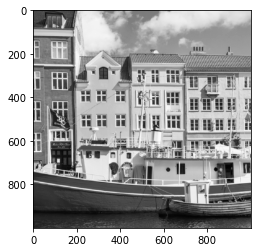

In [3]:
plt.imshow(img, cmap='gray')

In [4]:
N = 40
rad = 10

In [5]:
aliased_kern = aliased_circ(N, rad)
antialiased_kern = antialiased_circ(N, rad)

Text(0.5, 1.0, 'Anti-aliased')

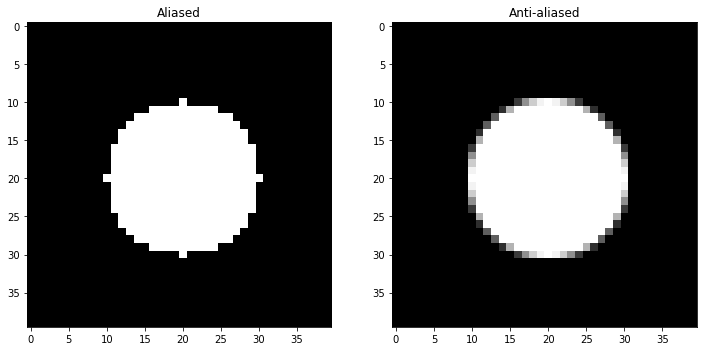

In [6]:
fig, (ax0, ax1) = plt.subplots(1,2, figsize=[12,8])
ax0.imshow(aliased_kern, cmap='gray')
ax0.set_title("Aliased")
ax1.imshow(antialiased_kern, cmap='gray')
ax1.set_title("Anti-aliased")

Text(0.5, 1.0, 'Fourier spectrum')

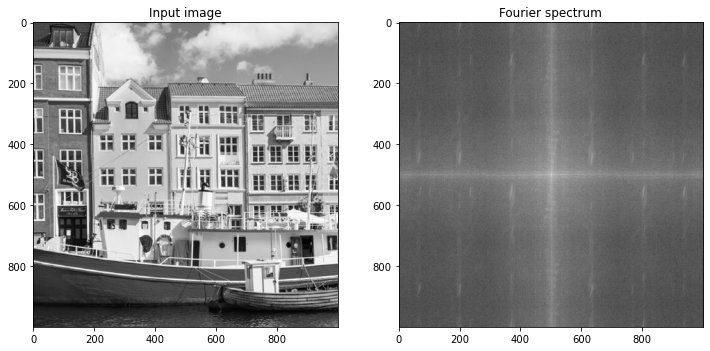

In [7]:
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20*np.log(np.abs(fshift))

fig, (ax0, ax1) = plt.subplots(1,2, figsize=[12,8])
ax0.imshow(img, cmap='gray')
ax0.set_title("Input image")
ax1.imshow(magnitude_spectrum, cmap='gray')
ax1.set_title("Fourier spectrum")

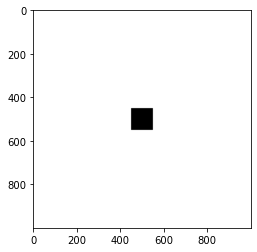

In [8]:
l = 50
rows, cols = img.shape
crow,ccol = rows//2 , cols//2
rect_mask = np.ones(img.shape)
rect_mask[crow-l:crow+l, ccol-l:ccol+l] = 0
plt.imshow(rect_mask, cmap='gray')

Text(0.5, 1.0, 'Image after filtering')

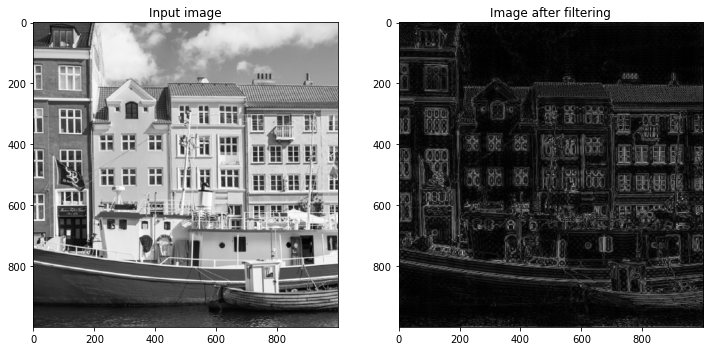

In [9]:
rows, cols = img.shape
crow,ccol = rows//2 , cols//2
rect_mask = np.ones(img.shape)
rect_mask[crow-l:crow+l, ccol-l:ccol+l] = 0

f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
fshift = np.multiply(fshift , rect_mask)

f_ishift = np.fft.ifftshift(fshift)
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)

fig, (ax0, ax1) = plt.subplots(1,2, figsize=[12,8])
ax0.imshow(img, cmap='gray')
ax0.set_title("Input image")
ax1.imshow(img_back, cmap='gray')
ax1.set_title("Image after filtering")

/Users/linesther/opt/anaconda3/envs/deconv/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


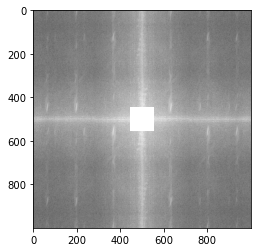

In [10]:
plt.imshow(20*np.log(np.abs(fshift)), cmap='gray')

Text(0.5, 1.0, 'Image after filtering')

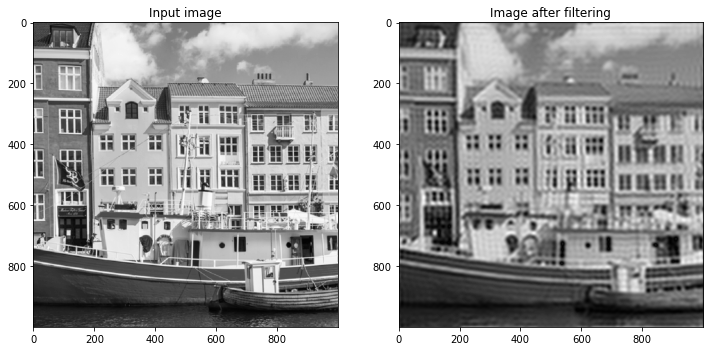

In [11]:
rows, cols = img.shape
crow,ccol = rows//2 , cols//2
rect_mask = np.zeros(img.shape)
rect_mask[crow-l:crow+l, ccol-l:ccol+l] = 1

f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
fshift = np.multiply(fshift , rect_mask)

f_ishift = np.fft.ifftshift(fshift)
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)

fig, (ax0, ax1) = plt.subplots(1,2, figsize=[12,8])
ax0.imshow(img, cmap='gray')
ax0.set_title("Input image")
ax1.imshow(img_back, cmap='gray')
ax1.set_title("Image after filtering")

Text(0.5, 1.0, 'Image after filtering')

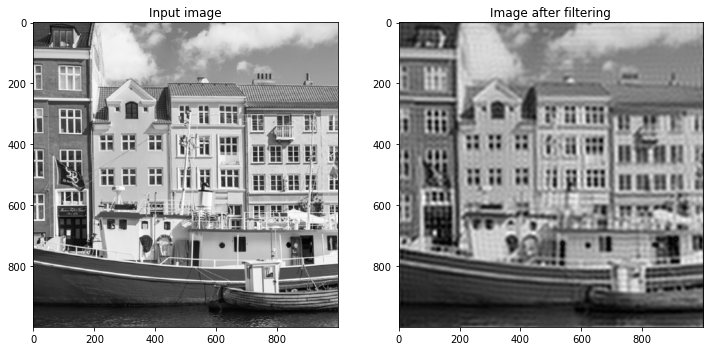

In [12]:
rows, cols = img.shape
crow,ccol = rows//2 , cols//2
circ_mask = antialiased_circ(rows, l)
circ_mask[crow-l:crow+l, ccol-l:ccol+l] = 1

f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
fshift = np.multiply(fshift , circ_mask)

f_ishift = np.fft.ifftshift(fshift)
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)

fig, (ax0, ax1) = plt.subplots(1,2, figsize=[12,8])
ax0.imshow(img, cmap='gray')
ax0.set_title("Input image")
ax1.imshow(img_back, cmap='gray')
ax1.set_title("Image after filtering")